In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
hd=pd.read_excel(r"E:\ds course\data sets\prac data sets\AirPassengers.xlsx")

In [3]:
hd.shape

(80, 9)

In [4]:
hd.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [5]:
hd1=hd.select_dtypes(include=[np.number]).copy()

In [6]:
hd1.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,1,37824,517356,4.00000,0.70
1,2,43936,646086,2.67466,0.80
2,3,42896,638330,3.29473,0.90
3,4,35792,506492,3.85684,0.40
4,5,38624,609658,3.90757,0.87


In [7]:
hd1.drop(["Week_num"],axis=1,inplace=True)

In [8]:
hd1.head()

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,37824,517356,4.00000,0.70
1,43936,646086,2.67466,0.80
2,42896,638330,3.29473,0.90
3,35792,506492,3.85684,0.40
4,38624,609658,3.90757,0.87


# objective: would like to predict the number of passengers by using an independent variable 

# ols : stands for ordinary least square

def: try to fit a best line by using best estimators

In [9]:
import statsmodels.formula.api as sm
model=sm.ols(formula="Passengers~Promotion_Budget+Service_Quality_Score+Inter_metro_flight_ratio",data=hd1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           8.71e-50
Time:                        16:34:08   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.921e+04   3542.694      5.424      0.000    1.22e+04    2.63e+04
Promotion_Budget             0.0555      0.004     15.476      0.000       0.048       0.063
Service_Quality_Score    -2802.0708    530.382     -5.283      0.000   -3858.419   -1745.723
Inter_metro_flight_ratio -2003.4508   2129.095     -0.941      0.350   -6243.912    2237.010
==============================================================================
Omnibus:                        6.902   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.759
Skew:                          -0.051   Prob(JB):                        0.252
Kurtosis:                       2.096   Cond. No.                     8.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import numpy as np
y=np.array([21,21,22.8,21.4,18.7,18.1,14.3,24.4,22.8,19.2])
yhat=np.array([21.5,21.14,26.1,20.2,17.5,19.7,14.9,22.5,25.1,18])


R2=1-np.sum((yhat-y)**2)/np.sum((y-np.mean(y))**2)
print("R2 value : ",R2)
n=y.shape[0]
k=3
adj_rsquared=1-(1-R2)*((n-1)/(n-k-1))
print("adj_rsquared : ",adj_rsquared)

R2 value :  0.6410828151089258
adj_rsquared :  0.46162422266338876


In [11]:
import statsmodels.formula.api as sm
model=sm.ols(formula="Passengers~Promotion_Budget+Service_Quality_Score",data=hd1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     744.0
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.38e-51
Time:                        16:34:34   Log-Likelihood:                -738.91
No. Observations:                  80   AIC:                             1484.
Df Residuals:                      77   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.853e+04   3464.796      5.348      0.000    1.16e+04    2.54e+04
Promotion_Budget          0.0544      0.003     16.063      0.000       0.048       0.061
Service_Quality_Score -2807.3095    529.958     -5.297      0.000   -3862.592   -1752.028
==============================================================================
Omnibus:                        7.728   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                2.913
Skew:                          -0.043   Prob(JB):                        0.233
Kurtosis:                       2.069   Cond. No.                     7.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept                18530.068170
Promotion_Budget             0.054399
Service_Quality_Score    -2807.309543
dtype: float64

In [14]:
hd1["predict"]=model.predict()

In [15]:
hd1.head()

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,predict
0,37824,517356,4.00000,0.70,35444.648767
1,43936,646086,2.67466,0.80,46168.113898
2,42896,638330,3.29473,0.90,44005.464281
3,35792,506492,3.85684,0.40,35255.548901
4,38624,609658,3.90757,0.87,40725.295167


In [16]:
hd1["error"]=(hd1["Passengers"]-hd1["predict"])**2

In [17]:
hd1.head()

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,predict,error
0,37824,517356,4.00000,0.70,35444.648767,5.661312e+06
1,43936,646086,2.67466,0.80,46168.113898,4.982332e+06
2,42896,638330,3.29473,0.90,44005.464281,1.230911e+06
3,35792,506492,3.85684,0.40,35255.548901,2.877798e+05
4,38624,609658,3.90757,0.87,40725.295167,4.415441e+06


In [18]:
pd.options.display.float_format="{:.2f}".format

In [19]:
hd1.head()

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,predict,error
0,37824,517356,4.00,0.70,35444.65,5661312.29
1,43936,646086,2.67,0.80,46168.11,4982332.46
2,42896,638330,3.29,0.90,44005.46,1230910.99
3,35792,506492,3.86,0.40,35255.55,287779.78
4,38624,609658,3.91,0.87,40725.30,4415441.38


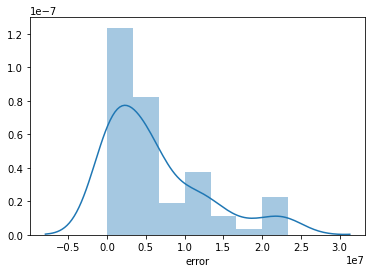

In [20]:
sbn.distplot(hd1["error"])

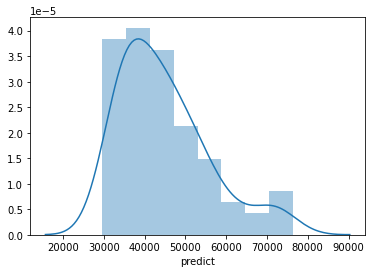

In [21]:
sbn.distplot(hd1["predict"])

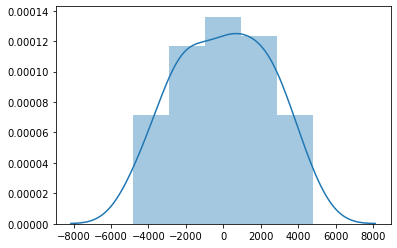

In [22]:
sbn.distplot(hd1["Passengers"]-hd1["predict"])

In [24]:
(hd1["Passengers"]-hd1["predict"]).skew()

-0.04349032939958689

In [25]:
(hd1["Passengers"]-hd1["predict"]).kurtosis()

-0.9128740155482986

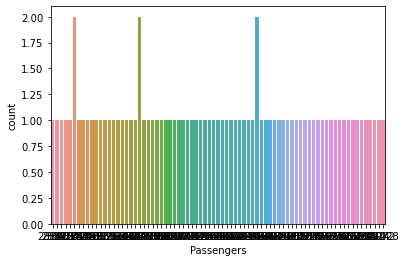

In [26]:
sbn.countplot(x="Passengers",data=hd1)

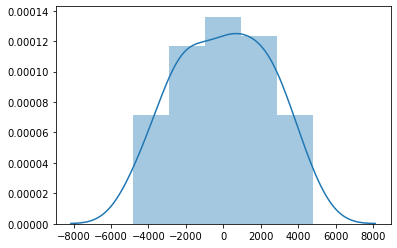

In [28]:
sbn.distplot(hd1["Passengers"]-hd1["predict"])